1)

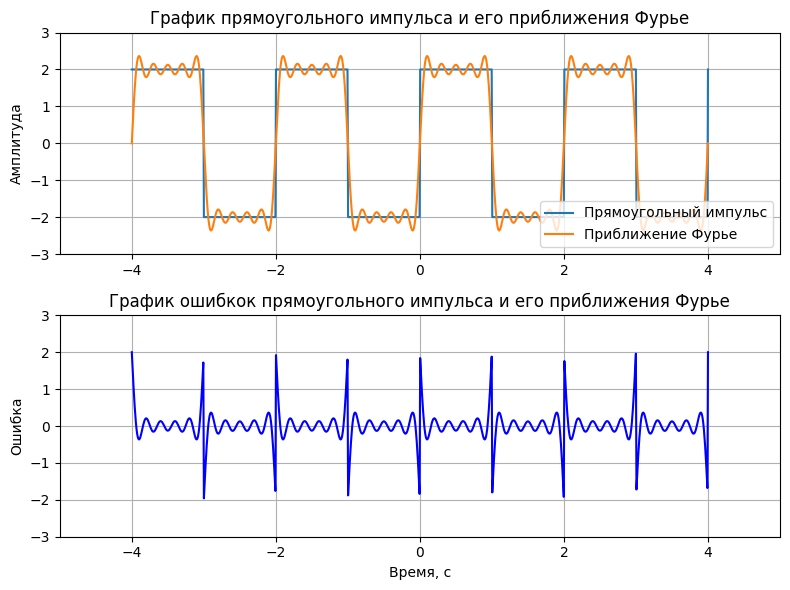

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def rectangular_pulse_series_function(t, period=1.0, amplitude=1.0):
  return np.where((t % period) < (period / 2), amplitude, -amplitude)

def fourier_series_function(t, original_function, period=1.0, amplitude=1.0, n_terms=10):
  def a0(period, amplitude):
    result, _ = quad(lambda t: original_function(t, period=period, amplitude=amplitude), 0, period)
    return (2 / period) * result

  def an(n, period, amplitude):
    integrand = lambda t: original_function(t, period=period, amplitude=amplitude) * np.cos(2 * np.pi * n * t / period)
    result, _ = quad(integrand, 0, period)
    return (2 / period) * result

  def bn(n, period, amplitude):
    integrand = lambda t: original_function(t, period=period, amplitude=amplitude) * np.sin(2 * np.pi * n * t / period)
    result, _ = quad(integrand, 0, period)
    return (2 / period) * result
  
  series = np.zeros_like(t)
  series += a0(period, amplitude) / 2
  for n in range(1, n_terms + 1):
    an_coeff = an(n, period, amplitude)
    bn_coeff = bn(n, period, amplitude)
    series += an_coeff * np.cos(2 * np.pi * n * t / period) + bn_coeff * np.sin(2 * np.pi * n * t / period)
  return series

# Задаем параметры
period = 2.0
amplitude = 2.0
length = 4

n_elements = 1000
n_terms = 10

x_lim_rt = length + 1
x_lim_lt = -1 * x_lim_rt
y_lim_rt = amplitude + 1
y_lim_lt = -1 * y_lim_rt

t = np.linspace(-length, length, n_elements)
pulse = rectangular_pulse_series_function(t, period=period, amplitude=amplitude)
fourier_series = fourier_series_function(t, rectangular_pulse_series_function, period=period, 
                                         amplitude=amplitude, n_terms=n_terms)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(t, pulse, label='Прямоугольный импульс')
axs[0].plot(t, fourier_series, label='Приближение Фурье')
axs[0].set_xlim(x_lim_lt, x_lim_rt)
axs[0].set_ylim(y_lim_lt, y_lim_rt)
axs[0].set_title('График прямоугольного импульса и его приближения Фурье')
axs[0].set_xlabel('')
axs[0].set_ylabel('Амплитуда')
axs[0].grid(True)
axs[0].legend(loc='lower right')

axs[1].plot(t, pulse - fourier_series, color='blue')
axs[1].set_xlim(x_lim_lt, x_lim_rt)
axs[1].set_ylim(y_lim_lt, y_lim_rt)
axs[1].set_title('График ошибкок прямоугольного импульса и его приближения Фурье')
axs[1].set_xlabel('Время, c')
axs[1].set_ylabel('Ошибка')
axs[1].grid(True)

plt.tight_layout()
plt.show()

2)

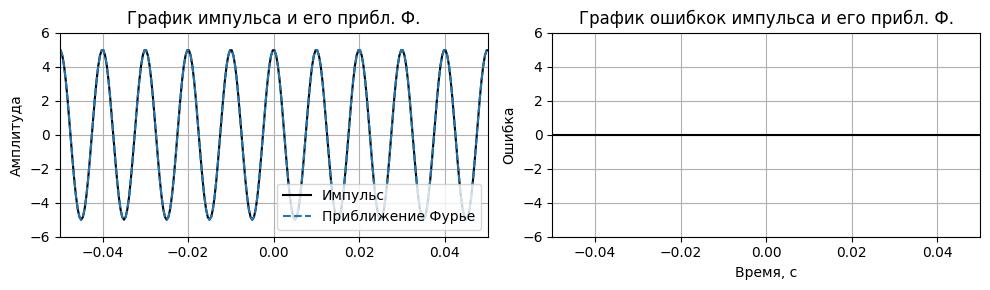

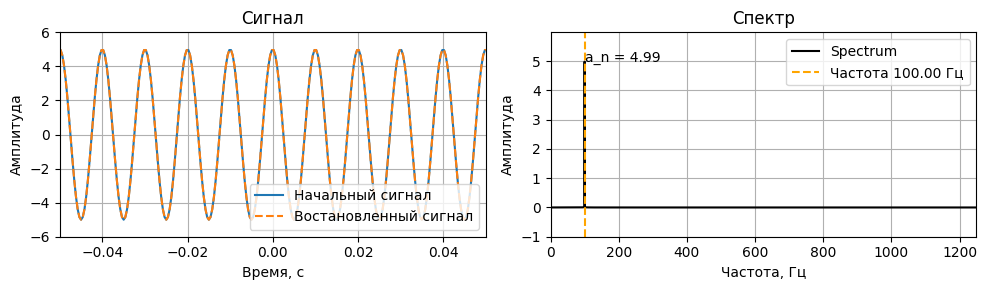

In [15]:
# Проверка пункта 1)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def cosin_series_function(t, period=1.0, amplitude=1.0):
  omega = 2 * np.pi / period
  return amplitude * np.cos(omega * t)

# Задаем параметры
frequency = 100
amplitude = 5.0
lenght = 4

period = 1 / frequency
n_elements = 20000
n_terms = 10

x_lim_rt = (lenght + 1) / frequency
x_lim_lt = -1 * x_lim_rt
y_lim_rt = amplitude + 1
y_lim_lt = -1 * y_lim_rt

t = np.linspace(-lenght, lenght, n_elements)
cosin = cosin_series_function(t, period=period, amplitude=amplitude)
fourier_series = fourier_series_function(t, cosin_series_function, period=period, 
                                         amplitude=amplitude, n_terms=n_terms)

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(t, cosin, label='Импульс', color='black')
axs[0].plot(t, fourier_series, label='Приближение Фурье', linestyle='--')
axs[0].set_xlim(x_lim_lt, x_lim_rt)
axs[0].set_ylim(y_lim_lt, y_lim_rt)
axs[0].set_title('График импульса и его прибл. Ф.')
axs[0].set_xlabel('')
axs[0].set_ylabel('Амплитуда')
axs[0].grid(True)
axs[0].legend(loc='lower right')

axs[1].plot(t, cosin - fourier_series, color='black')
axs[1].set_xlim(x_lim_lt, x_lim_rt)
axs[1].set_ylim(y_lim_lt, y_lim_rt)
axs[1].set_title('График ошибкок импульса и его прибл. Ф.')
axs[1].set_xlabel('Время, c')
axs[1].set_ylabel('Ошибка')
axs[1].grid(True)

plt.tight_layout()
plt.show()


# a)
import numpy as np
import matplotlib.pyplot as plt

def spectrum_function(t, original_function_results, n_elements=1000):
  # FFT и частоты
  fft_values = np.fft.fft(original_function_results)
  frequencies = np.fft.fftfreq(n_elements, t[1] - t[0])

  # Берем только положительные частоты и нормализуем по числу точек
  positive_frequencies = frequencies[:n_elements // 2]
  positive_fft_values = np.abs(fft_values[:n_elements // 2]) * 2 / len(t)
  
  # Найдем частоту с максимальной амплитудой
  max_amplitude_index = np.argmax(positive_fft_values)
  max_frequency = positive_frequencies[max_amplitude_index]
  max_amplitude = positive_fft_values[max_amplitude_index]
  
  # Восстановленный сигнал
  fft_values_reconstructed = np.fft.ifft(fft_values)
  
  return [[positive_frequencies, positive_fft_values], [max_frequency, max_amplitude], [fft_values_reconstructed]]

positive_values, max_values, reconstructed = spectrum_function(t, cosin, n_elements=n_elements)

# Границы графиков
max_positive_frequency = np.max(positive_values[0])
x_spectrum_lim_lt = 0
x_spectrum_lim_rt = max_positive_frequency
y_spectrum_lim_lt = -1
y_spectrum_lim_rt = max_values[1] + 1

# Построение графиков
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(t, cosin, label="Начальный сигнал")
axs[0].plot(t, reconstructed[0].real, linestyle='--', label="Востановленный сигнал")
axs[0].set_xlim(x_lim_lt, x_lim_rt)
axs[0].set_ylim(y_lim_lt, y_lim_rt)
axs[0].set_title('Сигнал')
axs[0].set_xlabel('Время, с')
axs[0].set_ylabel('Амплитуда')
axs[0].grid(True)
axs[0].legend(loc='lower right')

axs[1].plot(positive_values[0], positive_values[1], color='black', label="Spectrum")
axs[1].set_xlim(x_spectrum_lim_lt, x_spectrum_lim_rt)
axs[1].set_ylim(y_spectrum_lim_lt, y_spectrum_lim_rt)
axs[1].axvline(x=max_values[0], color='orange', linestyle='--', label=f"Частота {max_values[0]:.2f} Гц")
axs[1].set_title('Спектр')
axs[1].set_xlabel('Частота, Гц')
axs[1].set_ylabel('Амплитуда')
axs[1].grid(True)

axs[1].annotate(f"a_n = {max_values[1]:.2f}", 
                xy=(max_values[0], max_values[1]),
                xytext=(max_values[0] + .5, max_values[1]))

axs[1].legend(loc='upper right')
plt.tight_layout()
plt.show()

3)

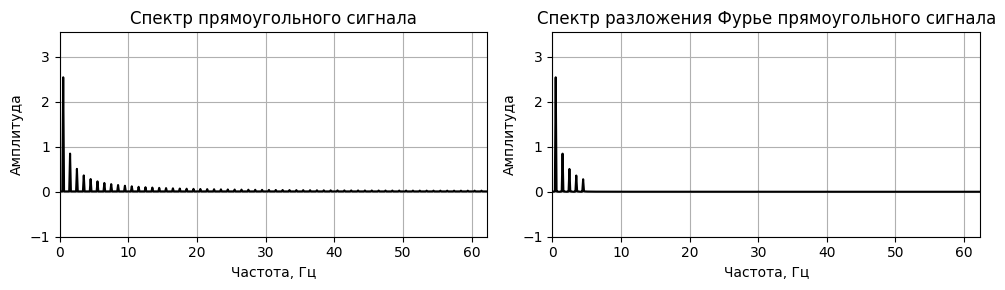

In [16]:
# Задаем параметры
period = 2.0
amplitude = 2.0
length = 4

n_elements = 1000
n_terms = 10

t = np.linspace(-length, length, n_elements)
pulse = rectangular_pulse_series_function(t, period=period, amplitude=amplitude)
fourier_series = fourier_series_function(t, rectangular_pulse_series_function, period=period, 
                                         amplitude=amplitude, n_terms=n_terms)

positive_values, max_values, _ = spectrum_function(t, pulse, n_elements=n_elements)

# Границы графиков
x_lim_rt = length + 1
x_lim_lt = -1 * x_lim_rt
y_lim_rt = amplitude + 1
y_lim_lt = -1 * y_lim_rt

max_positive_frequency = np.max(positive_values[0])
x_spectrum_lim_lt = 0
x_spectrum_lim_rt = max_positive_frequency
y_spectrum_lim_lt = -1
y_spectrum_lim_rt = max_values[1] + 1

# Построение графиков
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].plot(positive_values[0], positive_values[1], color='black')
axs[0].set_xlim(x_spectrum_lim_lt, x_spectrum_lim_rt)
axs[0].set_ylim(y_spectrum_lim_lt, y_spectrum_lim_rt)
axs[0].set_title('Спектр прямоугольного сигнала')
axs[0].set_xlabel('Частота, Гц')
axs[0].set_ylabel('Амплитуда')
axs[0].grid(True)

positive_values, max_values, _ = spectrum_function(t, fourier_series, n_elements=n_elements)

axs[1].plot(positive_values[0], positive_values[1], color='black')
axs[1].set_xlim(x_spectrum_lim_lt, x_spectrum_lim_rt)
axs[1].set_ylim(y_spectrum_lim_lt, y_spectrum_lim_rt)
axs[1].set_title('Спектр разложения Фурье прямоугольного сигнала')
axs[1].set_xlabel('Частота, Гц')
axs[1].set_ylabel('Амплитуда')
axs[1].grid(True)

plt.tight_layout()
plt.show()

4)

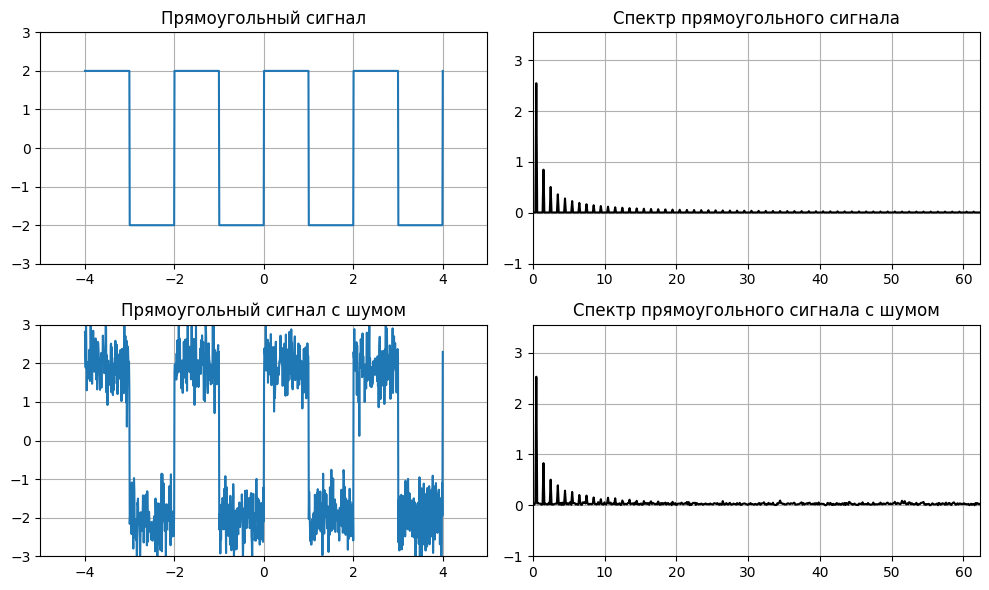

In [17]:
# Добавление шума к сигналу
noise_amplitude = amplitude / 4
noise = np.random.normal(0, noise_amplitude, n_elements)

pulse_with_noise = pulse + noise
fourier_series_with_noise = fourier_series + noise

# Спектры
positive_pulse_values, max_pulse_values, _ = spectrum_function(t, pulse, n_elements=n_elements)
positive_pulse_values_noise, max_pulse_values_noise, _ = spectrum_function(t, pulse_with_noise, n_elements=n_elements)

# Построение графиков
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].plot(t, pulse)
axs[0, 0].set_title('Прямоугольный сигнал')
axs[0, 0].set_xlim(x_lim_lt, x_lim_rt)
axs[0, 0].set_ylim(y_lim_lt, y_lim_rt)
axs[0, 0].grid(True)

axs[1, 0].plot(t, pulse_with_noise)
axs[1, 0].set_title('Прямоугольный сигнал с шумом')
axs[1, 0].set_xlim(x_lim_lt, x_lim_rt)
axs[1, 0].set_ylim(y_lim_lt, y_lim_rt)
axs[1, 0].grid(True)

axs[0, 1].plot(positive_pulse_values[0], positive_pulse_values[1], color='black')
axs[0, 1].set_title('Спектр прямоугольного сигнала')
axs[0, 1].set_xlim(x_spectrum_lim_lt, x_spectrum_lim_rt)
axs[0, 1].set_ylim(y_spectrum_lim_lt, y_spectrum_lim_rt)
axs[0, 1].grid(True)

axs[1, 1].plot(positive_pulse_values_noise[0], positive_pulse_values_noise[1], color='black')
axs[1, 1].set_title('Спектр прямоугольного сигнала с шумом')
axs[1, 1].set_xlim(x_spectrum_lim_lt, x_spectrum_lim_rt)
axs[1, 1].set_ylim(y_spectrum_lim_lt, y_spectrum_lim_rt)
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


1) Доп

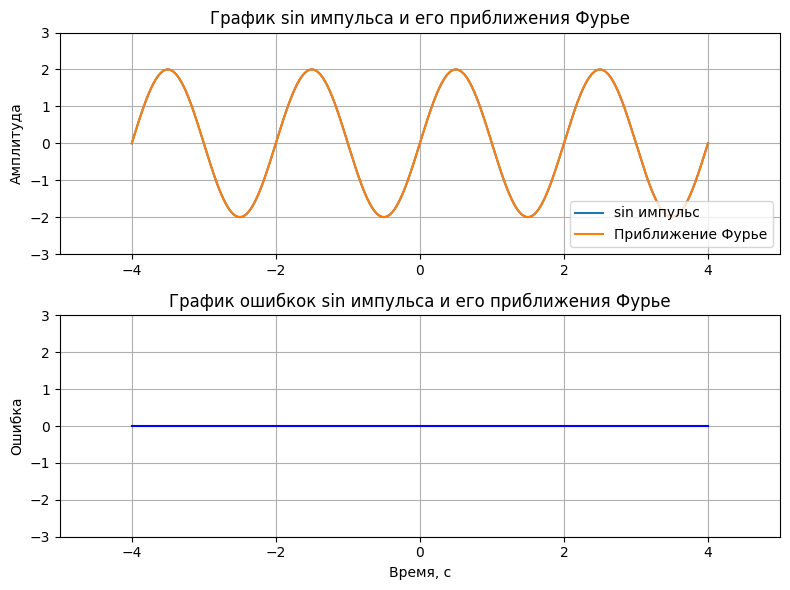

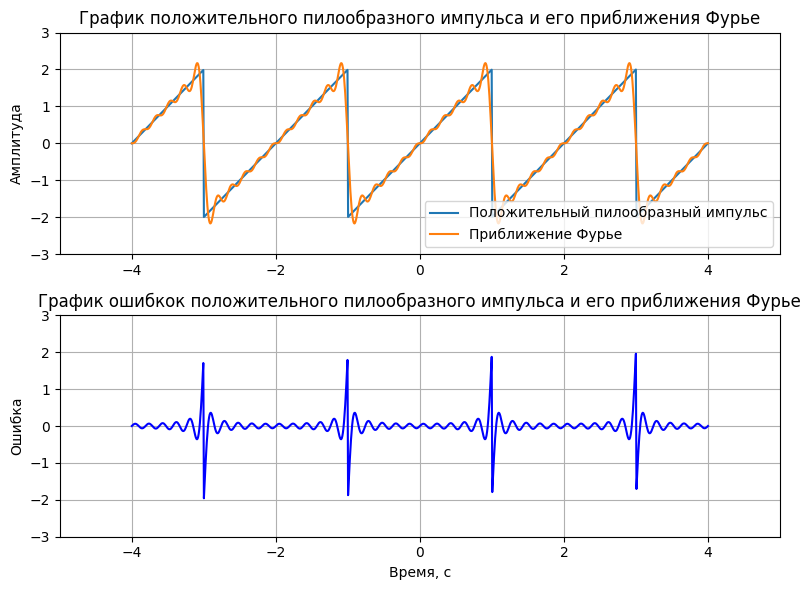

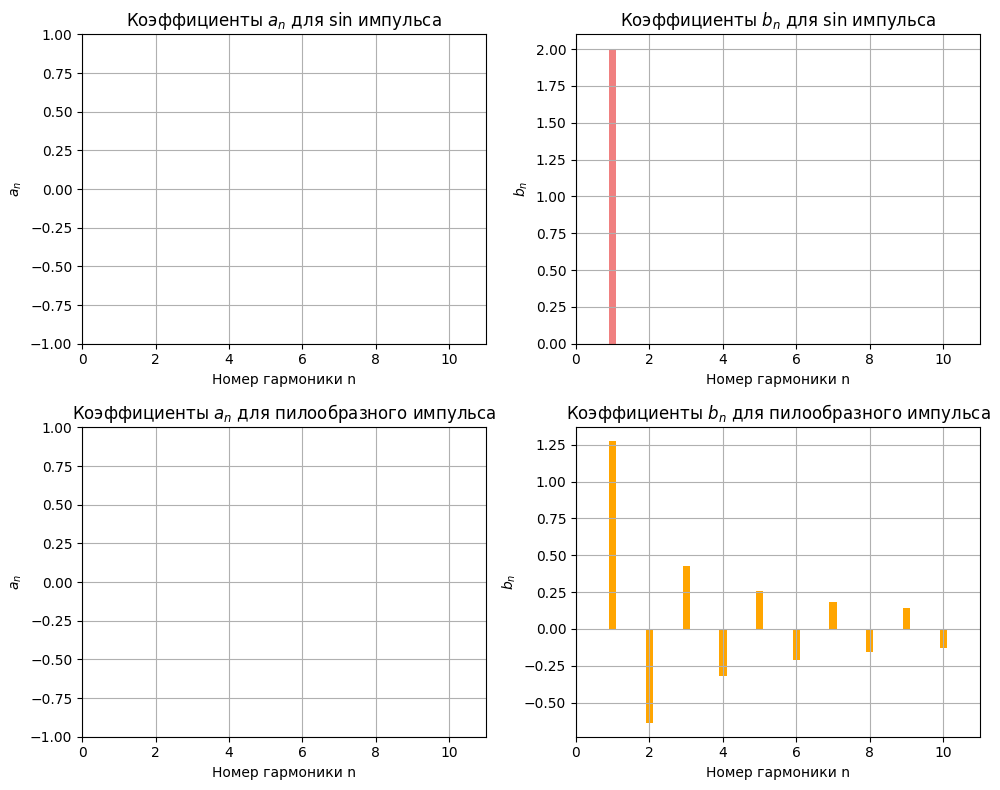

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def rectangular_pulse_series_function(t, period=1.0, amplitude=1.0):
  return np.where((t % period) < (period / 2), amplitude, -amplitude)

def fourier_series_function(t, original_function, period=1.0, amplitude=1.0, n_terms=10):
  def a0(period, amplitude):
    result, _ = quad(lambda t: original_function(t, period=period, amplitude=amplitude), 0, period)
    return (2 / period) * result

  def an(n, period, amplitude):
    integrand = lambda t: original_function(t, period=period, amplitude=amplitude) * np.cos(2 * np.pi * n * t / period)
    result, _ = quad(integrand, 0, period)
    return (2 / period) * result

  def bn(n, period, amplitude):
    integrand = lambda t: original_function(t, period=period, amplitude=amplitude) * np.sin(2 * np.pi * n * t / period)
    result, _ = quad(integrand, 0, period)
    return (2 / period) * result
  
  series = np.zeros_like(t)
  series += a0(period, amplitude) / 2
  for n in range(1, n_terms + 1):
    an_coeff = an(n, period, amplitude)
    bn_coeff = bn(n, period, amplitude)
    series += an_coeff * np.cos(2 * np.pi * n * t / period) + bn_coeff * np.sin(2 * np.pi * n * t / period)
  return series


def sin_series_function(t, period=1.0, amplitude=1.0):
  return amplitude * np.sin(2 * np.pi * t / period)

def sawtooth_function(t, period=1.0, amplitude=1.0):
  return amplitude * (2 * (t / period - np.floor(0.5 + t / period)))


# Задаем параметры
period = 2.0
amplitude = 2.0
length = 4

n_elements = 1000
n_terms = 10

x_lim_rt = length + 1
x_lim_lt = -1 * x_lim_rt
y_lim_rt = amplitude + 1
y_lim_lt = -1 * y_lim_rt

t = np.linspace(-length, length, n_elements)
sin = sin_series_function(t, period=period, amplitude=amplitude)
sin_fourier_series = fourier_series_function(t, sin_series_function, period=period, 
                                         amplitude=amplitude, n_terms=n_terms)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(t, sin, label='sin импульс')
axs[0].plot(t, sin_fourier_series, label='Приближение Фурье')
axs[0].set_xlim(x_lim_lt, x_lim_rt)
axs[0].set_ylim(y_lim_lt, y_lim_rt)
axs[0].set_title('График sin импульса и его приближения Фурье')
axs[0].set_xlabel('')
axs[0].set_ylabel('Амплитуда')
axs[0].grid(True)
axs[0].legend(loc='lower right')

axs[1].plot(t, sin - sin_fourier_series, color='blue')
axs[1].set_xlim(x_lim_lt, x_lim_rt)
axs[1].set_ylim(y_lim_lt, y_lim_rt)
axs[1].set_title('График ошибкок sin импульса и его приближения Фурье')
axs[1].set_xlabel('Время, c')
axs[1].set_ylabel('Ошибка')
axs[1].grid(True)

plt.tight_layout()
plt.show()

sawtooth = sawtooth_function(t, period=period, amplitude=amplitude)
sawtooth_fourier_series = fourier_series_function(t, sawtooth_function, period=period, 
                                         amplitude=amplitude, n_terms=n_terms)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].plot(t, sawtooth, label='Положительный пилообразный импульс')
axs[0].plot(t, sawtooth_fourier_series, label='Приближение Фурье')
axs[0].set_xlim(x_lim_lt, x_lim_rt)
axs[0].set_ylim(y_lim_lt, y_lim_rt)
axs[0].set_title('График положительного пилообразного импульса и его приближения Фурье')
axs[0].set_xlabel('')
axs[0].set_ylabel('Амплитуда')
axs[0].grid(True)
axs[0].legend(loc='lower right')

axs[1].plot(t, sawtooth - sawtooth_fourier_series, color='blue')
axs[1].set_xlim(x_lim_lt, x_lim_rt)
axs[1].set_ylim(y_lim_lt, y_lim_rt)
axs[1].set_title('График ошибкок положительного пилообразного импульса и его приближения Фурье')
axs[1].set_xlabel('Время, c')
axs[1].set_ylabel('Ошибка')
axs[1].grid(True)

plt.tight_layout()
plt.show()



def fourier_coefficients(original_function, period=1.0, amplitude=1.0, n_terms=10):
  def an(n, period, amplitude):
    integrand = lambda t: original_function(t, period=period, amplitude=amplitude) * np.cos(2 * np.pi * n * t / period)
    result, _ = quad(integrand, 0, period)
    return (2 / period) * result

  def bn(n, period, amplitude):
    integrand = lambda t: original_function(t, period=period, amplitude=amplitude) * np.sin(2 * np.pi * n * t / period)
    result, _ = quad(integrand, 0, period)
    return (2 / period) * result

  a_coeffs = [an(n, period, amplitude) for n in range(1, n_terms + 1)]
  b_coeffs = [bn(n, period, amplitude) for n in range(1, n_terms + 1)]
  
  return a_coeffs, b_coeffs


a_n_sin, b_n_sin = fourier_coefficients(sin_series_function, period=period, amplitude=amplitude, n_terms=n_terms)
a_n_sawtooth, b_n_sawtooth = fourier_coefficients(sawtooth_function, period=period, amplitude=amplitude, n_terms=n_terms)
n_values = np.arange(1, n_terms + 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
width_bar = .2

# Коэффициенты для sin
axs[0][0].bar(n_values, a_n_sin, width=width_bar, color='red')
axs[0][0].set_xlim(0, n_terms + 1)
axs[0][0].set_ylim(-1, 1)
axs[0][0].set_title('Коэффициенты $a_n$ для sin импульса')
axs[0][0].set_xlabel('Номер гармоники n')
axs[0][0].set_ylabel('$a_n$')
axs[0][0].grid(True)

axs[0][1].bar(n_values, b_n_sin, width=width_bar, color='lightcoral')
axs[0][1].set_xlim(0, n_terms + 1)
axs[0][1].set_title('Коэффициенты $b_n$ для sin импульса')
axs[0][1].set_xlabel('Номер гармоники n')
axs[0][1].set_ylabel('$b_n$')
axs[0][1].grid(True)

# Коэффициенты для пилообразной волны
axs[1][0].bar(n_values, a_n_sawtooth, width=width_bar, color='darkorange')
axs[1][0].set_xlim(0, n_terms + 1)
axs[1][0].set_ylim(-1, 1)
axs[1][0].set_title('Коэффициенты $a_n$ для пилообразного импульса')
axs[1][0].set_xlabel('Номер гармоники n')
axs[1][0].set_ylabel('$a_n$')
axs[1][0].grid(True)

axs[1][1].bar(n_values, b_n_sawtooth, width=width_bar, color='orange', align='center')
axs[1][1].set_xlim(0, n_terms + 1)
axs[1][1].set_title('Коэффициенты $b_n$ для пилообразного импульса')
axs[1][1].set_xlabel('Номер гармоники n')
axs[1][1].set_ylabel('$b_n$')
axs[1][1].grid(True)

plt.tight_layout()
plt.show()